In [1]:
import os
import pandas as pd

In [2]:
cwd = os.getcwd()

health_outcome_df = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450','/Users/mattrusso/MSF_HealthOutcome_450.xlsx')

social_df = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450', '/Users/mattrusso/MSF_Dataset_Social_450_modified_nam.xlsx')
stress_df = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450', '/Users/mattrusso/MSF_Mother_stress_450_modified_nam.xlsx')
physhealth_df = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450', '/Users/mattrusso/MSF_Physical&health_Fetaures_450.xlsx')

outcome_df = pd.read_excel(health_outcome_df, skiprows = 5, index_col = 'Mother_UID')

In [3]:
outcome_df

,PreTerm,Full Term,Weight_Baby_Kg,Hospital Stay in days,NICU Stay,Jaundice,C-section,Vaginal Delivery,Hours_In_Labour,Induce_Pain
Mother_UID,,,,,,,,,,
1,0,1,2.566,5,0,0,0,1,18,0
2,0,1,3.100,5,0,0,0,1,20,0
3,0,1,2.150,7,0,0,1,0,5,0
4,0,1,2.500,5,0,0,0,1,10,0
5,0,1,2.670,5,0,0,0,1,20,0
...,...,...,...,...,...,...,...,...,...,...
446,1,0,1.800,7,1,0,1,0,18,0
447,0,1,2.075,7,1,1,1,0,11,0
448,0,1,2.400,7,1,1,1,0,28,0


In [4]:
#Notes on cleaning lifestyle_df

#We want our columns to be easily machine readable. Current hierarchical organization of columns is unreadable for algorithms.
#I'm heavily modifying the file in Excel and saving it as "MSF_Mother_lifestyle_450_modified_nam" 

#nested values are flattened.
#daily diet and sleep patterns need to be further parsed to avoid repetition in column names
#side note: surveyed sleep is poorly defined here: if someone sleeps exactly 8 hours they fall between the cracks of the divisions "More than 8 hours and Less than 7 hours"
lifestyle_path = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450', '/Users/mattrusso/MSF_Mother_lifestyle_450_modified_nam.xlsx')

lifestyle_df = pd.read_excel(lifestyle_path)
lifestyle_df.iloc[2,0] = 'Mother_UID'
lifestyle_df.columns = lifestyle_df.iloc[2]
lifestyle_df = lifestyle_df.drop(range(0,3))
lifestyle_df = lifestyle_df.set_index("Mother_UID")
lifestyle_df.index = lifestyle_df.index.astype(int)
lifestyle_df

2,Exercise_a,Exercise_b,Exercise_c,Laptop_a,Laptop_b,Laptop_c,Outside Food_a,Outside Food_b,Outside Food_c,Tea/Coffee_a,...,Travel_Mode_b,Travel_Mode_c,Works_As_b,Works_As_c,Contraceptive_Time_,Contraceptive_Type_before_preg,Intercourse_,Cravings_a,Cravings_b,Cravings_c
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,2,2,2,2,2,2,2,...,3,3,3,1,1,6,1,2,2,2
2,4,4,4,3,3,3,2,2,2,2,...,3,3,3,1,1,6,1,2,2,2
3,3,3,3,2,2,2,2,2,2,2,...,4,4,3,1,1,6,1,2,2,2
4,4,4,4,3,3,3,2,2,2,1,...,3,3,1,1,1,6,1,2,2,2
5,4,4,4,1,1,1,2,2,2,2,...,2,2,1,1,1,6,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,2,2,2,3,3,3,2,2,2,2,...,5,5,2,1,2,1,1,NaN,NaN,NaN
447,4,4,4,3,3,3,2,2,2,3,...,2,2,3,1,5,1,3,NaN,NaN,NaN
448,4,4,4,4,4,4,4,4,4,3,...,2,2,3,3,6,4,3,NaN,NaN,NaN


In [5]:
lifestyle_freqs_df = lifestyle_df.describe()

In [6]:
lifestyle_freqs_df

2,Exercise_a,Exercise_b,Exercise_c,Laptop_a,Laptop_b,Laptop_c,Outside Food_a,Outside Food_b,Outside Food_c,Tea/Coffee_a,...,Travel_Mode_b,Travel_Mode_c,Works_As_b,Works_As_c,Contraceptive_Time_,Contraceptive_Type_before_preg,Intercourse_,Cravings_a,Cravings_b,Cravings_c
count,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,200,200,200
unique,4,4,4,4,4,4,4,4,4,3,...,7,7,5,5,6,6,3,3,3,3
top,4,4,4,1,1,1,2,2,2,2,...,1,3,1,1,1,6,1,2,2,2
freq,198,196,177,176,176,193,225,225,221,234,...,196,204,237,292,367,365,280,159,176,160


In [7]:
#We have nans. We'll set these to -1 for now.

lifestyle_df.fillna(-1, inplace=True)

In [8]:
lifestyle_df_objs = lifestyle_df.astype(str)
lifestyle_freqs_df = lifestyle_df_objs.describe()

In [9]:
lifestyle_freqs_df

2,Exercise_a,Exercise_b,Exercise_c,Laptop_a,Laptop_b,Laptop_c,Outside Food_a,Outside Food_b,Outside Food_c,Tea/Coffee_a,...,Travel_Mode_b,Travel_Mode_c,Works_As_b,Works_As_c,Contraceptive_Time_,Contraceptive_Type_before_preg,Intercourse_,Cravings_a,Cravings_b,Cravings_c
count,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
unique,4,4,4,4,4,4,4,4,4,3,...,7,7,5,5,6,6,3,4,4,4
top,4,4,4,1,1,1,2,2,2,2,...,1,3,1,1,1,6,1,-1,-1,-1
freq,198,196,177,176,176,193,225,225,221,234,...,196,204,237,292,367,365,280,250,250,250


In [10]:
lifestyle_df.astype(int)

2,Exercise_a,Exercise_b,Exercise_c,Laptop_a,Laptop_b,Laptop_c,Outside Food_a,Outside Food_b,Outside Food_c,Tea/Coffee_a,...,Travel_Mode_b,Travel_Mode_c,Works_As_b,Works_As_c,Contraceptive_Time_,Contraceptive_Type_before_preg,Intercourse_,Cravings_a,Cravings_b,Cravings_c
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,2,2,2,2,2,2,2,...,3,3,3,1,1,6,1,2,2,2
2,4,4,4,3,3,3,2,2,2,2,...,3,3,3,1,1,6,1,2,2,2
3,3,3,3,2,2,2,2,2,2,2,...,4,4,3,1,1,6,1,2,2,2
4,4,4,4,3,3,3,2,2,2,1,...,3,3,1,1,1,6,1,2,2,2
5,4,4,4,1,1,1,2,2,2,2,...,2,2,1,1,1,6,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,2,2,2,3,3,3,2,2,2,2,...,5,5,2,1,2,1,1,-1,-1,-1
447,4,4,4,3,3,3,2,2,2,3,...,2,2,3,1,5,1,3,-1,-1,-1
448,4,4,4,4,4,4,4,4,4,3,...,2,2,3,3,6,4,3,-1,-1,-1


In [11]:
#Loading and cleaning social_df

#Like the lifestyle dataframe, the social dataframe contains nested categories. I've fixed these in the excel file to expedite cleaning here.

social_df = pd.read_excel(social_df, index_col = "Mother_UID", skiprows=range(1,6))

In [12]:
#loading and cleaning stress_df

stress_df = pd.read_excel(stress_df, skiprows = [2,3,4,5], header=1, index_col = 'Mother_UID')

In [13]:
#loading and cleaning physhealth_df
#As before, the organization here is messy. I'm going to rework it in excel and then load it here.

#load in the physical and health features dataset, remove the extraneous rows at the top, rename the first column Mother ID, and 
# assign that column as the index of the dataframe.

physhealth_df = os.path.join(cwd, '/Users/mattrusso/MSF Dataset_450', '/Users/mattrusso/MSF_Physical&health_Fetaures_450.xlsx')
physhealth_df = pd.read_excel(physhealth_df) 
physhealth_df = physhealth_df.iloc[5::, :]
physhealth_df.rename(columns = {'Unnamed: 0': 'Mother_UID',
                     }, inplace=True)
physhealth_df.set_index('Mother_UID', inplace=True)

In [14]:
#There are some improperly named columns here. Let's handle them

physhealth_df = physhealth_df.rename(columns = {
    'Unnamed: 12': 'Menstrual_Cycle_b', 
    'Issues_Pregnancy': 'Thyroid',
    'Unnamed: 15': 'Hypertension',
    'Unnamed: 16': 'Diabetes',
    'Unnamed: 17': 'Gastric_Issue',
    'Unnamed: 18': 'Cold/Virus',
    'Unnamed: 19': 'Low_Amniotic',
    'Unnamed: 20': 'High_Amniotic',
    'Unnamed: 21': 'No_Health_Issues',
    'Unnamed: 22': 'IVF',
    'Unnamed: 23': 'No of births(single/Twins)',
})

In [15]:
physhealth_df

,Age_Of_Mother,weight_before_preg,wt_before_delivery,Height(cm),BMI,Hemoglobin,PCOS,Age_Father,Fertility_Treatment,Miscarriage History,...,Thyroid,Hypertension,Diabetes,Gastric_Issue,Cold/Virus,Low_Amniotic,High_Amniotic,No_Health_Issues,IVF,No of births(single/Twins)
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,29.0,59.0,60,156.0,25.0,12.5,0.0,31.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,24.0,54.0,56,145.0,26.0,12.5,0.0,28.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,28.0,62.0,65,151.0,28.0,11.5,0.0,31.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
4,25.0,49.0,52,151.0,22.0,11.5,0.0,30.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
5,21.0,39.0,42,151.0,18.0,10.1,0.0,25.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,24.0,56.0,NaN,149.0,26.0,11.4,0.0,28.0,0.0,NaN,...,0,0,0,0,0,0,1,0,0,1
447,35.0,55.0,NaN,151.0,25.0,12.4,1.0,40.0,0.0,NaN,...,0,0,0,0,0,0,1,0,0,1
448,38.0,50.0,NaN,145.0,24.0,11.0,1.0,45.0,1.0,NaN,...,0,0,0,0,0,0,1,0,0,1


1) outcome_df
2) lifestyle_df
3) social_df
4) stress_df
5) physhealth_df
Each one has the Mother_UID as its index and all extraneous rows have been removed.

Before we join them into one dataframe, let's do some quick EDA with sweetviz.

In [16]:
!pip install sweetviz
import sweetviz as sv
outcome_report = sv.analyze(outcome_df)
outcome_report.show_html('outcome.html')
lifestyle_report = sv.analyze(lifestyle_df)
lifestyle_report.show_html('lifestyle.html')
social_report = sv.analyze(social_df)
social_report.show_html('social.html')
stress_report=sv.analyze(stress_df)
stress_report.show_html('stress.html')
physhealth_report=sv.analyze(physhealth_df)
physhealth_report.show_html('physhealth.html')

                                             |          | [  0%]   00:00 -> (? left)

Report outcome.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report lifestyle.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report social.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report stress.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report physhealth.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
#sweetviz reports a number of duplicates;


#In the case of the outcome_df, it is conceivable
#that different mother delivered babies with roughly the same weight and in the same mannner. It may be worth looking
#for identical rows once the whole dataframe is completed. Matching on all features would be less likely.

len(outcome_df[outcome_df.duplicated(keep=False)])
outcome_df[outcome_df.duplicated(keep=False)]

,PreTerm,Full Term,Weight_Baby_Kg,Hospital Stay in days,NICU Stay,Jaundice,C-section,Vaginal Delivery,Hours_In_Labour,Induce_Pain
Mother_UID,,,,,,,,,,
6,0,1,2.560,7,0,0,1,0,10,0
10,0,1,2.900,7,0,0,1,0,15,0
31,0,1,2.860,5,0,0,0,1,20,0
35,0,1,2.560,7,0,0,1,0,10,0
38,0,1,3.150,5,0,0,0,1,18,0
74,1,0,1.150,7,1,0,1,0,16,0
75,1,0,1.150,7,1,0,1,0,16,0
80,0,1,2.580,5,0,0,0,1,18,0
82,0,1,3.150,7,0,0,1,0,12,0


In [18]:
merged_df = pd.merge(outcome_df, lifestyle_df, on='Mother_UID')
merged_df = pd.merge(merged_df, social_df, on='Mother_UID')     
merged_df = pd.merge(merged_df, stress_df, on='Mother_UID')
merged_df = pd.merge(merged_df, physhealth_df, on='Mother_UID')    

In [19]:
merged_df = merged_df.dropna()

In [20]:
merged_df

,PreTerm,Full Term,Weight_Baby_Kg,Hospital Stay in days,NICU Stay,Jaundice,C-section,Vaginal Delivery,Hours_In_Labour,Induce_Pain,...,Thyroid,Hypertension,Diabetes,Gastric_Issue,Cold/Virus,Low_Amniotic,High_Amniotic,No_Health_Issues,IVF,No of births(single/Twins)
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,0,1,2.566,5,0,0,0,1,18,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,3.100,5,0,0,0,1,20,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,2.150,7,0,0,1,0,5,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,2.500,5,0,0,0,1,10,0,...,0,0,0,0,0,0,0,1,0,1
5,0,1,2.670,5,0,0,0,1,20,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,2.320,7,1,0,1,0,12,0,...,0,0,0,0,0,0,0,1,0,1
197,1,0,1.060,1,0,0,1,0,16,0,...,0,0,0,0,0,0,0,1,0,1
198,0,1,2.480,7,1,0,1,0,12,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
list(merged_df.columns)

['PreTerm',
 'Full Term',
 'Weight_Baby_Kg',
 'Hospital Stay in days',
 'NICU Stay',
 'Jaundice',
 'C-section',
 'Vaginal Delivery',
 'Hours_In_Labour',
 'Induce_Pain',
 'Exercise_a',
 'Exercise_b',
 'Exercise_c',
 'Laptop_a',
 'Laptop_b',
 'Laptop_c',
 'Outside Food_a',
 'Outside Food_b',
 'Outside Food_c',
 'Tea/Coffee_a',
 'Tea/Coffee_b',
 'Tea/Coffee_c',
 'Cigratte_a',
 'Cigratte_b',
 'Cigratte_c',
 'Alcohol_a',
 'Alcohol_b',
 'Alcohol_c',
 'NOISE/AIR pollution_a',
 'NOISE/AIR pollution_b',
 'NOISE/AIR pollution_c',
 'Health Concious_a',
 'Health Concious_b',
 'Health Concious_c',
 'Diet_Grains_veg_pulses_rice_salad_a',
 'Diet_More_pulses_and_rice_a',
 'Diet_dairy_prods_a',
 'Diet_snacks_high_carbs_a',
 'Diet_non_vegetarian_a',
 'Diet_fruits_salads_a',
 'Diet_Grains_veg_pulses_rice_salad_b',
 'Diet_More_pulses_and_rice_b',
 'Diet_dairy_prods_b',
 'Diet_snacks_high_carbs_b',
 'Diet_non_vegetarian_b',
 'Diet_fruits_salads_b',
 'Diet_Grains_veg_pulses_rice_salad_c',
 'Diet_More_pulses

In [22]:
merged_df.shape

(200, 133)

In [23]:
labels = merged_df['Hypertension']
features = merged_df.drop('Hypertension', axis = 1)
print(labels.shape)
print(features.shape)

(200,)
(200, 132)


In [24]:
labels.unique()

array([0, 1], dtype=object)

In [25]:
merged_df

,PreTerm,Full Term,Weight_Baby_Kg,Hospital Stay in days,NICU Stay,Jaundice,C-section,Vaginal Delivery,Hours_In_Labour,Induce_Pain,...,Thyroid,Hypertension,Diabetes,Gastric_Issue,Cold/Virus,Low_Amniotic,High_Amniotic,No_Health_Issues,IVF,No of births(single/Twins)
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,0,1,2.566,5,0,0,0,1,18,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,3.100,5,0,0,0,1,20,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,2.150,7,0,0,1,0,5,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,2.500,5,0,0,0,1,10,0,...,0,0,0,0,0,0,0,1,0,1
5,0,1,2.670,5,0,0,0,1,20,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,2.320,7,1,0,1,0,12,0,...,0,0,0,0,0,0,0,1,0,1
197,1,0,1.060,1,0,0,1,0,16,0,...,0,0,0,0,0,0,0,1,0,1
198,0,1,2.480,7,1,0,1,0,12,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
xls = pd.ExcelFile('/Users/mattrusso/codebook.xlsx')
df_code_list = pd.read_excel(xls, "Code_Lists")

In [27]:
xls = pd.ExcelFile('/Users/mattrusso/codebook.xlsx')
df_code = pd.read_excel(xls, "column_list")

In [28]:
df_code_list.head()

,Code List Name,Value,Value Label
0,yes_no_vers1,0,No
1,yes_no_vers1,1,Yes
2,exercise_vers1,1,> 4 times a week
3,exercise_vers1,2,3-4 times a week
4,exercise_vers1,3,1-2 times a week


In [29]:
df_code.head()

,Variable Topic,Variable Name,Variable Label,Variable Type,Variable Unit\n(if Numeric),Variable Code List\n(if Coded)
0,Age_Of_Mother,1,mother's age,Numeric,Years,NaN
1,weight_before_preg,2,mother's weight before pregnancy,Numeric,kg,NaN
2,wt_before_delivery,3,mother's weight before delivery,Numeric,kg,NaN
3,Height(cm),4,mother's height,Numeric,cm,NaN
4,BMI,5,mother's BMI,Numeric,BMI,NaN


In [30]:
num_cols = merged_df._get_numeric_data().columns

In [31]:
num_cols

Index(['PreTerm', 'Full Term', 'Weight_Baby_Kg', 'Hospital Stay in days',
       'NICU Stay', 'Jaundice', 'C-section', 'Vaginal Delivery',
       'Hours_In_Labour', 'Induce_Pain',
       ...
       'depressed_a', 'depressed_b', 'Age_Of_Mother', 'weight_before_preg',
       'Height(cm)', 'BMI', 'Hemoglobin', 'PCOS', 'Age_Father',
       'Fertility_Treatment'],
      dtype='object', length=118)

In [32]:
list(num_cols)

['PreTerm',
 'Full Term',
 'Weight_Baby_Kg',
 'Hospital Stay in days',
 'NICU Stay',
 'Jaundice',
 'C-section',
 'Vaginal Delivery',
 'Hours_In_Labour',
 'Induce_Pain',
 'Exercise_a',
 'Exercise_b',
 'Exercise_c',
 'Laptop_a',
 'Laptop_b',
 'Laptop_c',
 'Outside Food_a',
 'Outside Food_b',
 'Outside Food_c',
 'Tea/Coffee_a',
 'Tea/Coffee_b',
 'Tea/Coffee_c',
 'Cigratte_a',
 'Cigratte_b',
 'Cigratte_c',
 'Alcohol_a',
 'Alcohol_b',
 'Alcohol_c',
 'NOISE/AIR pollution_a',
 'NOISE/AIR pollution_b',
 'NOISE/AIR pollution_c',
 'Health Concious_a',
 'Health Concious_b',
 'Health Concious_c',
 'Diet_Grains_veg_pulses_rice_salad_a',
 'Diet_More_pulses_and_rice_a',
 'Diet_dairy_prods_a',
 'Diet_snacks_high_carbs_a',
 'Diet_non_vegetarian_a',
 'Diet_fruits_salads_a',
 'Diet_Grains_veg_pulses_rice_salad_b',
 'Diet_More_pulses_and_rice_b',
 'Diet_dairy_prods_b',
 'Diet_snacks_high_carbs_b',
 'Diet_non_vegetarian_b',
 'Diet_fruits_salads_b',
 'Diet_Grains_veg_pulses_rice_salad_c',
 'Diet_More_pulses

In [33]:
cat_cols = [col for col in merged_df.columns if merged_df[col].dtype=="O"]

In [34]:
cat_cols

['wt_before_delivery',
 'Miscarriage History',
 'Menstrual_Cycle',
 'Menstrual_Cycle_b',
 'Time_Taken_To_Concieve',
 'Thyroid',
 'Hypertension',
 'Diabetes',
 'Gastric_Issue',
 'Cold/Virus',
 'Low_Amniotic',
 'High_Amniotic',
 'No_Health_Issues',
 'IVF',
 'No of births(single/Twins)']

In [35]:
print(len(cat_cols))
print(len(num_cols))

15
118


In [36]:
cat_cols.remove('Hypertension')

In [37]:
merged_new_df = pd.get_dummies(features, columns = cat_cols)

In [38]:
merged_new_df

,PreTerm,Full Term,Weight_Baby_Kg,Hospital Stay in days,NICU Stay,Jaundice,C-section,Vaginal Delivery,Hours_In_Labour,Induce_Pain,...,Cold/Virus_1,Low_Amniotic_0,High_Amniotic_0,High_Amniotic_1,No_Health_Issues_0,No_Health_Issues_1,IVF_0,IVF_1,No of births(single/Twins)_1,No of births(single/Twins)_2
Mother_UID,,,,,,,,,,,,,,,,,,,,,
1,0,1,2.566,5,0,0,0,1,18,0,...,0,1,1,0,0,1,1,0,1,0
2,0,1,3.100,5,0,0,0,1,20,0,...,0,1,1,0,0,1,1,0,1,0
3,0,1,2.150,7,0,0,1,0,5,0,...,0,1,1,0,0,1,1,0,1,0
4,0,1,2.500,5,0,0,0,1,10,0,...,0,1,1,0,0,1,1,0,1,0
5,0,1,2.670,5,0,0,0,1,20,0,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,1,2.320,7,1,0,1,0,12,0,...,0,1,1,0,0,1,1,0,1,0
197,1,0,1.060,1,0,0,1,0,16,0,...,0,1,1,0,0,1,1,0,1,0
198,0,1,2.480,7,1,0,1,0,12,0,...,0,1,1,0,0,1,1,0,1,0


In [39]:
y = labels
X = merged_new_df

In [40]:
y = y.astype('int')
y.astype

<bound method NDFrame.astype of Mother_UID
1      0
2      0
3      0
4      0
5      0
      ..
196    0
197    0
198    0
199    0
200    0
Name: Hypertension, Length: 200, dtype: int64>

In [41]:
feat = merged_new_df.columns

In [42]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

np.seterr(divide='ignore', invalid='ignore')
k_best   = SelectKBest(score_func= f_classif, #TODO choose either chi2 or f_classif
                     k= 10#TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)
support = k_best.get_support()

/Users/mattrusso/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  9  24  34  40  46  55  59  63 178] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [43]:
support

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [66]:
from itertools import compress
print(list(compress(feat, support))) 

['PreTerm', 'Full Term', 'wt_before_delivery_49', 'wt_before_delivery_80', 'wt_before_delivery_84', 'Time_Taken_To_Concieve_2', 'No_Health_Issues_0', 'No_Health_Issues_1', 'IVF_0', 'IVF_1']


In [67]:
feat_df = merged_new_df[['PreTerm', 'Full Term', 'wt_before_delivery_49', 'wt_before_delivery_80', 'wt_before_delivery_84', 'Time_Taken_To_Concieve_2', 'No_Health_Issues_0', 'No_Health_Issues_1', 'IVF_0', 'IVF_1']]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat_df, y, random_state=42, test_size = 0.25, stratify = y) 

In [69]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)

In [70]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_resampled, y_train_resampled)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


/Users/mattrusso/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


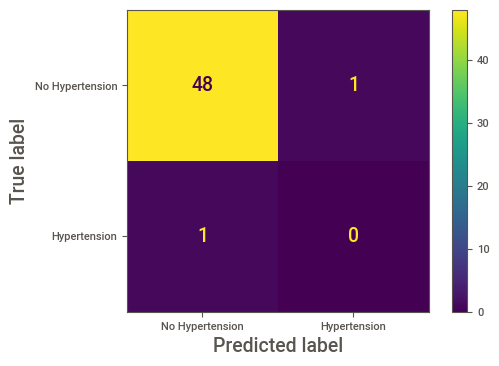

In [72]:
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
plot_confusion_matrix(clf, 
                      X_test, 
                      y_test, 
                      display_labels=["No Hypertension", "Hypertension"])

In [73]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier()

# fit the model

rfc = rfc.fit(X_train_resampled, y_train_resampled)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9800


/Users/mattrusso/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


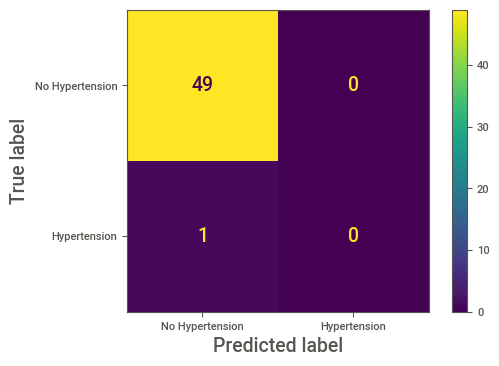

In [74]:
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
plot_confusion_matrix(rfc, 
                      X_test, 
                      y_test, 
                      display_labels=["No Hypertension", "Hypertension"])

In [75]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [76]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(feat_df, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9833333333333333


/Users/mattrusso/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


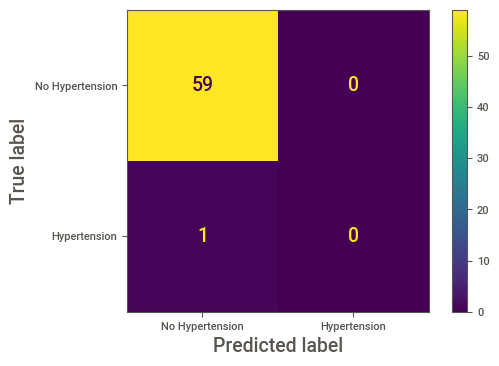

In [78]:
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
plot_confusion_matrix(logreg, 
                      X_test, 
                      y_test, 
                      display_labels=["No Hypertension", "Hypertension"])